In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../datasets/output_obj/lstm_100_gen_labeled.csv")

In [4]:
df.head()

,Unnamed: 0,sequence_id,decoded_text,sequence_length,generation_time,starter_text,valid,in_master
0,0,0,[1*]C([3*])=O.[1*]C(=O)CCCCCCCCC(=O)C(C)C(=O)C...,271,1.333960,NaN,True,False
1,1,1,[3*]C(=O)CCC([3*])=O.[4*]CC(=O)C(C)CC(=O)C([4*...,262,0.927156,NaN,True,False
2,2,2,[3*]CC(O)C[3*].[1*]C(=O)C(C)(C[4*])CCCC(=O)CCC...,196,0.585413,NaN,True,False
3,3,3,[3*]C(=O)C[4*].[4*]C(C)C(=O)C(=O)CC(C)C(=O)NCN...,264,0.949563,NaN,True,False
4,4,4,[1*]C(=O)C([3*])C.[1*]C(=O)CCCCCCCCC(=O)CC(O)C...,201,0.590528,NaN,True,False


In [7]:
test_val = df["decoded_text"].values[0]

In [26]:
def parse_parts(value: str):
    split_values = value.split("|")
    smiles_part = split_values[0]
    smarts_part = split_values[1]
    weight_part = "|" + "|".join(split_values[2:])
    return smiles_part, smarts_part, weight_part

In [7]:
# write a function to show the smiles part using RDKit Draw
from rdkit import Chem
from rdkit.Chem import Draw

def show_smiles(smiles):
    """
    Show the SMILES representation of a molecule in high resolution.
    """
    mol = Chem.MolFromSmiles(smiles)
    return Draw.MolToImage(mol, size=(600, 600), kekulize=True)

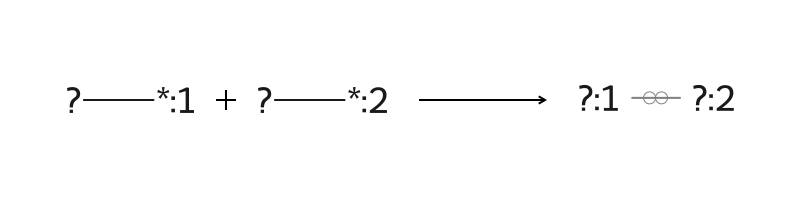

In [8]:
# write a function to show the SMARTS part using RDKit SMARTS to reaction and then show the reaction
from rdkit.Chem import AllChem
from rdkit.Chem import rdChemReactions

def show_smarts(smarts):
    reaction = rdChemReactions.ReactionFromSmarts(smarts)
    return Draw.ReactionToImage(reaction)

show_smarts("[3*]-[*:1].[4*]-[*:2]>>[$([O&D2]-&!@[#0,#6,#1]):1]-&!@[$([C&!D1&!$(C=*)]-&!@[#6]):2]")

In [49]:
def show_SMILES_and_SMARTS_in_grid(value: str):
    smiles_part, smarts_part, weight_part = parse_parts(value)
    return show_smiles(smiles_part), show_smarts(smarts_part), weight_part

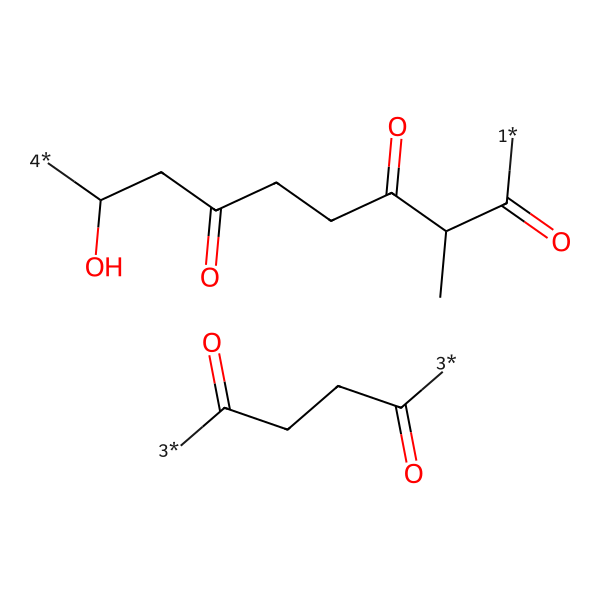

In [108]:
i = 42
show_SMILES_and_SMARTS_in_grid(df["decoded_text"].values[i])[0]

In [109]:
valid_id_list = [2, 3, 9, 14, 16, 19, 20, 22, 25, 36, 37, 42]

In [3]:
def show_valid_mols_smiles_grid(smiles_list: list[str], SMARTS_list: list[str] = None):
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    # add smarts as label
    legends = SMARTS_list if SMARTS_list else ["" for _ in smiles_list]
    return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(500, 500), legends=legends)

In [120]:
image = show_valid_mols_smiles_grid([parse_parts(df["decoded_text"].values[i])[0] for i in valid_id_list],
                            [parse_parts(df["decoded_text"].values[i])[1] for i in valid_id_list])

In [121]:
type(image)

IPython.core.display.Image

In [5]:
from IPython.core.display import Image

In [125]:
with open("test.png", "wb") as f:
    f.write(image.data)

In [4]:
existing_polymer_df = pd.read_csv("../datasets/bio_polymer_raw.csv")

In [10]:
indexed_psmiles_list = existing_polymer_df["Indexed_PSMILES"].values
indexed_psmiles_list = [s.replace("|", ".") for s in indexed_psmiles_list if isinstance(s, str) and len(s) > 0]

In [ ]:
show_valid_mols_smiles_grid(indexed_psmiles_list, indexed_psmiles_list)

[18:23:26] SMILES Parse Error: Failed parsing SMILES '[6*]C(=O)NC1=CC=C(CC2=CC=C(NC(=O)[6*])C=C2)C=C1|[3*]OCCO[3*]' for input: '[6*]C(=O)NC1=CC=C(CC2=CC=C(NC(=O)[6*])C=C2)C=C1|[3*]OCCO[3*]'
[18:23:26] SMILES Parse Error: Failed parsing SMILES '[3*]OC(=O)C(C)OC(=O)C(C)[3*]|[3*]OC(=O)COC(=O)CO[3*]' for input: '[3*]OC(=O)C(C)OC(=O)C(C)[3*]|[3*]OC(=O)COC(=O)CO[3*]'
[18:23:26] SMILES Parse Error: Failed parsing SMILES '[3*]CC(O)C[3*]|[3*]OC(=O)CCCCCCCCC(=O)O[3*]' for input: '[3*]CC(O)C[3*]|[3*]OC(=O)CCCCCCCCC(=O)O[3*]'
[18:23:26] SMILES Parse Error: Failed parsing SMILES '[3*]OCCCC[3*]|[3*]C(=O)CCC(=O)[3*]' for input: '[3*]OCCCC[3*]|[3*]C(=O)CCC(=O)[3*]'
[18:23:26] SMILES Parse Error: Failed parsing SMILES '[4*]CC(C(=O)NC(C)C)[4*]|[4*]CC(C(=O)NCNC(=O)CCC)[4*]' for input: '[4*]CC(C(=O)NC(C)C)[4*]|[4*]CC(C(=O)NCNC(=O)CCC)[4*]'


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()